In [241]:
from IPython.display import Markdown
import sympy as sp
from sympy.physics.mechanics import *
theta, phi, psi = dynamicsymbols('theta phi psi')

N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [phi, N.z])
B = A.orientnew('B', 'Axis', [theta, A.x])
e_b = B.orientnew('e_b', 'Axis', [psi, B.z])

DCMphi = A.dcm(N)
DCMtheta = B.dcm(A)
DCMpsi = e_b.dcm(B)
DCM = DCMphi * DCMtheta * DCMpsi

omega = e_b.ang_vel_in(N)
display(Markdown(r'$\omega_{B/N}^{(b)} = ' + sp.latex(omega.express(e_b).simplify()) + r'$'))

$\omega_{B/N}^{(b)} = (\sin{\left(\psi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} + \cos{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \theta{\left(t \right)})\mathbf{\hat{e_b}_x} + (- \sin{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \theta{\left(t \right)} + \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)})\mathbf{\hat{e_b}_y} + (\cos{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} + \frac{d}{d t} \psi{\left(t \right)})\mathbf{\hat{e_b}_z}$

In [242]:
r = sp.symbols('r')

P = Point('P') # The point of contact with the finger
CM = P.locatenew('CM', r*e_b.z)
r_P_CM = CM.pos_from(P)
P.set_vel(N, 0)
P.set_vel(e_b, 0)
CM.set_vel(e_b, 0)
CM.set_vel(N, omega.cross(r_P_CM))

display(Markdown(r'$\vec{v}_{CM} = ' + sp.latex(CM.vel(N).express(e_b).simplify()) + r'$'))
display(Markdown(r'$\vec{a}_{CM} = ' + sp.latex(CM.acc(N).express(e_b).simplify()) + r'$'))

$\vec{v}_{CM} = r \left(- \sin{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \theta{\left(t \right)} + \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)}\right)\mathbf{\hat{e_b}_x} -  r \left(\sin{\left(\psi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} + \cos{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \theta{\left(t \right)}\right)\mathbf{\hat{e_b}_y}$

$\vec{a}_{CM} = r \left(\frac{\left(\cos{\left(\psi{\left(t \right)} - 2 \theta{\left(t \right)} \right)} - \cos{\left(\psi{\left(t \right)} + 2 \theta{\left(t \right)} \right)}\right) \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{4} - \sin{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)} + \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)} + 2 \cos{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)}\right)\mathbf{\hat{e_b}_x} + r \left(\frac{\left(- \sin{\left(\psi{\left(t \right)} - 2 \theta{\left(t \right)} \right)} + \sin{\left(\psi{\left(t \right)} + 2 \theta{\left(t \right)} \right)}\right) \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{4} - \sin{\left(\psi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)} - 2 \sin{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} - \cos{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)}\right)\mathbf{\hat{e_b}_y} -  r \left(\sin^{2}{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2} + \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2}\right)\mathbf{\hat{e_b}_z}$

In [243]:
m, g, t  = sp.symbols('m g t')
theta_0, phi_0, psi_0, thetadot_0, phidot_0, psidot_0, phidot_0 = sp.symbols('theta_0 phi_0 psi_0 thetadot_0 phidot_0 psidot_0 phidot_0')

Ixx = 2 * m * r**2 / 5
Iyy = 2 * m * r**2 / 5
Izz = 2 * m * r**2 / 5
I_c = inertia(e_b, Ixx, Iyy, Izz)
display(Markdown("$I^{(B)} = "  + sp.latex(I_c.express(e_b).to_matrix(e_b)) + "$"))

# Eulers first law
Fg = -m * g * N.z
display(Markdown("$F_g = " + sp.latex(Fg.express(N)) + "$"))
Fr = m*CM.acc(N) - Fg

# Eulers second law
Hc = I_c.dot(omega)
Hcdot = Hc.diff(t, N)
r_p = -r_P_CM
M = r_p.cross(Fr)

fancyWayToWriteZero  = (Hcdot - M).express(e_b).simplify()
display(Markdown("$ \dot{H}_c - M = " + sp.latex(fancyWayToWriteZero) + "$"))

$I^{(B)} = \left[\begin{matrix}\frac{2 m r^{2}}{5} & 0 & 0\\0 & \frac{2 m r^{2}}{5} & 0\\0 & 0 & \frac{2 m r^{2}}{5}\end{matrix}\right]$

$F_g = -  g m\mathbf{\hat{n}_z}$

$ \dot{H}_c - M = \frac{m r \left(\frac{5 g \sin{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)}}{2} - \frac{5 g \sin{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)}}{2} + \frac{5 r \sin{\left(\psi{\left(t \right)} - 2 \theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{4} - r \sin{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \psi{\left(t \right)} + 6 r \sin{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} + r \sin{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \psi{\left(t \right)} + 6 r \sin{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} - \frac{5 r \sin{\left(\psi{\left(t \right)} + 2 \theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{4} - 2 r \sin{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \psi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} + \frac{7 r \cos{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)}}{2} - \frac{7 r \cos{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)}}{2} + 7 r \cos{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)}\right)}{5}\mathbf{\hat{e_b}_x} + \frac{m r \left(\frac{5 g \cos{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)}}{2} - \frac{5 g \cos{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)}}{2} - \frac{7 r \sin{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)}}{2} + \frac{7 r \sin{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)}}{2} - 7 r \sin{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)} + \frac{5 r \cos{\left(\psi{\left(t \right)} - 2 \theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{4} - r \cos{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \psi{\left(t \right)} + 6 r \cos{\left(\psi{\left(t \right)} - \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} + r \cos{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \psi{\left(t \right)} + 6 r \cos{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} - \frac{5 r \cos{\left(\psi{\left(t \right)} + 2 \theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{4} - 2 r \cos{\left(\psi{\left(t \right)} \right)} \frac{d}{d t} \psi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)}\right)}{5}\mathbf{\hat{e_b}_y} + \frac{2 m r^{2} \left(- \sin{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} + \cos{\left(\theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)} + \frac{d^{2}}{d t^{2}} \psi{\left(t \right)}\right)}{5}\mathbf{\hat{e_b}_z}$

In [244]:
FrInBody = Fr.express(e_b).simplify()
display(Markdown("$F_r = " + sp.latex(FrInBody.simplify()) + "$"))

print("F_r in the 1 direction is: ")
display(FrInBody.dot(e_b.x))

print("F_r in the 2 direction is: ")
display(FrInBody.dot(e_b.y))

print("F_r in the 3 direction is: ")
display(FrInBody.dot(e_b.z))

$F_r = \frac{m \left(4 g \sin{\left(\psi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)} + r \left(\cos{\left(\psi{\left(t \right)} - 2 \theta{\left(t \right)} \right)} - \cos{\left(\psi{\left(t \right)} + 2 \theta{\left(t \right)} \right)}\right) \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2} - 4 r \sin{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)} + 4 r \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)} + 8 r \cos{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)}\right)}{4}\mathbf{\hat{e_b}_x} -  \frac{m \left(- 4 g \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} + r \left(\sin{\left(\psi{\left(t \right)} - 2 \theta{\left(t \right)} \right)} - \sin{\left(\psi{\left(t \right)} + 2 \theta{\left(t \right)} \right)}\right) \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2} + 4 r \sin{\left(\psi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \phi{\left(t \right)} + 8 r \sin{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} + 4 r \cos{\left(\psi{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)}\right)}{4}\mathbf{\hat{e_b}_y} + m \left(g \cos{\left(\theta{\left(t \right)} \right)} - r \left(\sin^{2}{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2} + \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2}\right)\right)\mathbf{\hat{e_b}_z}$

F_r in the 1 direction is: 


m*(g*sin(psi(t))*sin(theta(t)) + r*(cos(psi(t) - 2*theta(t)) - cos(psi(t) + 2*theta(t)))*Derivative(phi(t), t)**2/4 - r*sin(psi(t))*Derivative(theta(t), (t, 2)) + r*sin(theta(t))*cos(psi(t))*Derivative(phi(t), (t, 2)) + 2*r*cos(psi(t))*cos(theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t))

F_r in the 2 direction is: 


m*(g*sin(theta(t))*cos(psi(t)) + r*(-sin(psi(t) - 2*theta(t)) + sin(psi(t) + 2*theta(t)))*Derivative(phi(t), t)**2/4 - r*sin(psi(t))*sin(theta(t))*Derivative(phi(t), (t, 2)) - 2*r*sin(psi(t))*cos(theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) - r*cos(psi(t))*Derivative(theta(t), (t, 2)))

F_r in the 3 direction is: 


m*(g*cos(theta(t)) - r*(sin(theta(t))**2*Derivative(phi(t), t)**2 + Derivative(theta(t), t)**2))

In [245]:
eq1 = dot(fancyWayToWriteZero, e_b.x)
eq2 = dot(fancyWayToWriteZero, e_b.y)
eq3 = dot(fancyWayToWriteZero, e_b.z)

sol = sp.solve([eq1, eq2, eq3], [psi.diff(t,2), theta.diff(t,2), phi.diff(t,2)], dict=True)

display(Markdown("$\ddot{\psi} = " + sp.latex(sol[0][psi.diff(t,2)].simplify()) + "$"))
display(Markdown(r"$\ddot{\theta} = " + sp.latex(sol[0][theta.diff(t,2)].simplify()) + "$"))
display(Markdown("$\ddot{\phi} = " + sp.latex(sol[0][phi.diff(t,2)].simplify()) + "$"))

$\ddot{\psi} = - \frac{\left(5 \sin{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} + \frac{2 \frac{d}{d t} \psi{\left(t \right)}}{\tan{\left(\theta{\left(t \right)} \right)}} - \frac{12 \frac{d}{d t} \phi{\left(t \right)}}{\sin{\left(\theta{\left(t \right)} \right)}}\right) \frac{d}{d t} \theta{\left(t \right)}}{7}$

$\ddot{\theta} = \frac{5 g \sin{\left(\theta{\left(t \right)} \right)}}{7 r} - \frac{5 \sin{\left(\psi{\left(t \right)} - 3 \theta{\left(t \right)} \right)} \sin{\left(\psi{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{56 \sin{\left(\theta{\left(t \right)} \right)}} + \frac{5 \sin{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \sin{\left(\psi{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{56 \sin{\left(\theta{\left(t \right)} \right)}} - \frac{5 \sin{\left(\psi{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} + \theta{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{14} + \frac{5 \sin{\left(\theta{\left(t \right)} \right)} \cos^{2}{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2}}{7} - \frac{2 \sin{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} \frac{d}{d t} \psi{\left(t \right)}}{7}$

$\ddot{\phi} = - \frac{2 \cdot \left(6 \cos{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \phi{\left(t \right)} - \frac{d}{d t} \psi{\left(t \right)}\right) \frac{d}{d t} \theta{\left(t \right)}}{7 \sin{\left(\theta{\left(t \right)} \right)}}$

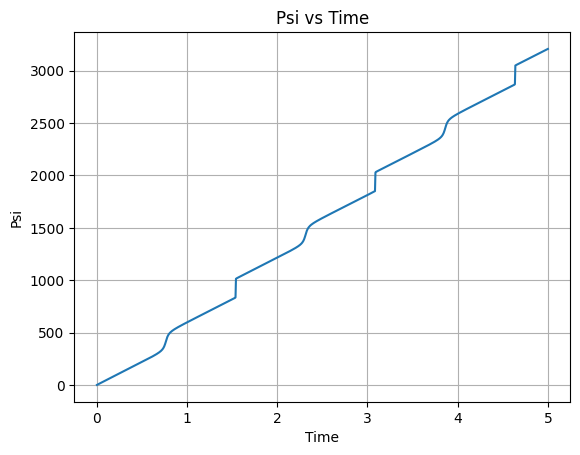

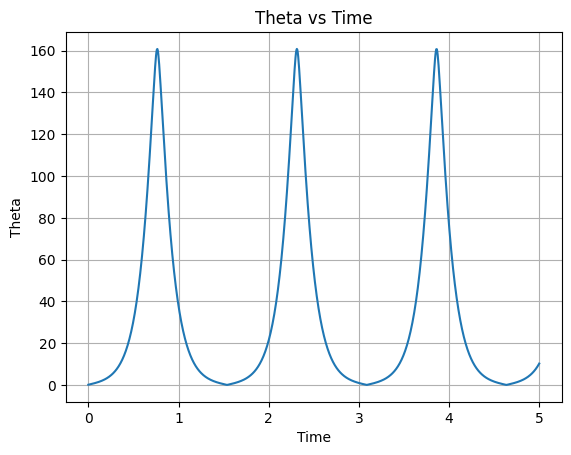

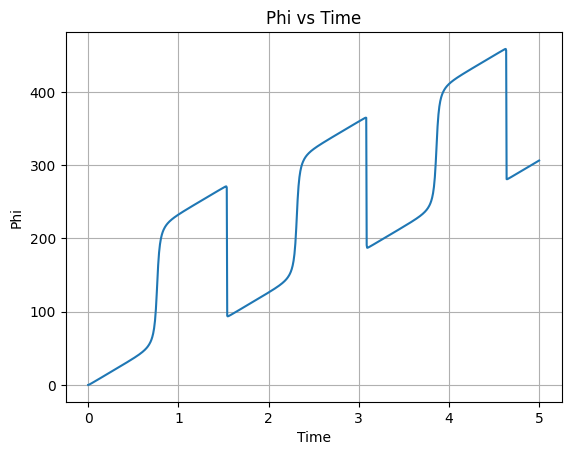

In [346]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

givens = {r: 0.12, m: .625 , g: 9.80665, theta_0: 0.1 * np.pi/180, phi_0: 0, psi_0: 0, thetadot_0: 10 * np.pi/180, psidot_0: 500 * np.pi/180, phidot_0: 10*np.pi/180}

w1, w2, w3 = sp.symbols('w1 w2 w3')
dw1dt = sp.lambdify([psi, w1, theta, w2, phi, w3], sol[0][psi.diff(t,2)].subs(givens).subs({psi.diff(t): w1, theta.diff(t): w2, phi.diff(t): w3}), 'numpy')
dw2dt = sp.lambdify([psi, w1, theta, w2, phi, w3], sol[0][theta.diff(t,2)].subs(givens).subs({psi.diff(t): w1, theta.diff(t): w2, phi.diff(t): w3}), 'numpy')
dw3dt = sp.lambdify([psi, w1, theta, w2, phi, w3], sol[0][phi.diff(t,2)].subs(givens).subs({psi.diff(t): w1, theta.diff(t): w2, phi.diff(t): w3}), 'numpy')

def model(z, t):
    m_psi, m_w1, m_theta, m_w2, m_phi, m_w3 = z
    return [m_w1, dw1dt(m_psi, m_w1, m_theta, m_w2, m_phi, m_w3), m_w2, dw2dt(m_psi, m_w1, m_theta, m_w2, m_phi, m_w3), m_w3, dw3dt(m_psi, m_w1, m_theta, m_w2, m_phi, m_w3)]

initial_conditions = [givens[psi_0], givens[psidot_0], givens[theta_0], givens[thetadot_0], givens[phi_0], givens[phidot_0]]

tlin = np.linspace(0, 5, 1000)

solution = odeint(model, initial_conditions, tlin)

psi_plot = solution[:, 0] * 180/np.pi
theta_plot = solution[:, 2] * 180/np.pi
phi_plot = solution[:, 4] * 180/np.pi


plt.figure()
plt.plot(tlin, psi_plot)
plt.xlabel('Time')
plt.ylabel('Psi')
plt.title('Psi vs Time')
plt.grid()

plt.figure()
plt.plot(tlin, theta_plot)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta vs Time')
plt.grid()

plt.figure()
plt.plot(tlin, phi_plot)
plt.xlabel('Time')
plt.ylabel('Phi')
plt.title('Phi vs Time')
plt.grid()

plt.show()

In [338]:
%load_ext jupyter_manim
display(Markdown(r"${DCM}_{\phi} = " + sp.latex(DCMphi) + "$"))
display(Markdown(r"${DCM}_{\theta} = " + sp.latex(DCMtheta) + "$"))
display(Markdown(r"${DCM}_{\psi} = " + sp.latex(DCMpsi) + "$"))
display(Markdown(r"${DCM} = " + sp.latex(DCM) + "$"))

The jupyter_manim module is not an IPython extension.


${DCM}_{\phi} = \left[\begin{matrix}\cos{\left(\phi{\left(t \right)} \right)} & \sin{\left(\phi{\left(t \right)} \right)} & 0\\- \sin{\left(\phi{\left(t \right)} \right)} & \cos{\left(\phi{\left(t \right)} \right)} & 0\\0 & 0 & 1\end{matrix}\right]$

${DCM}_{\theta} = \left[\begin{matrix}1 & 0 & 0\\0 & \cos{\left(\theta{\left(t \right)} \right)} & \sin{\left(\theta{\left(t \right)} \right)}\\0 & - \sin{\left(\theta{\left(t \right)} \right)} & \cos{\left(\theta{\left(t \right)} \right)}\end{matrix}\right]$

${DCM}_{\psi} = \left[\begin{matrix}\cos{\left(\psi{\left(t \right)} \right)} & \sin{\left(\psi{\left(t \right)} \right)} & 0\\- \sin{\left(\psi{\left(t \right)} \right)} & \cos{\left(\psi{\left(t \right)} \right)} & 0\\0 & 0 & 1\end{matrix}\right]$

${DCM} = \left[\begin{matrix}- \sin{\left(\phi{\left(t \right)} \right)} \sin{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} + \cos{\left(\phi{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} & \sin{\left(\phi{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} + \sin{\left(\psi{\left(t \right)} \right)} \cos{\left(\phi{\left(t \right)} \right)} & \sin{\left(\phi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)}\\- \sin{\left(\phi{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} - \sin{\left(\psi{\left(t \right)} \right)} \cos{\left(\phi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} & - \sin{\left(\phi{\left(t \right)} \right)} \sin{\left(\psi{\left(t \right)} \right)} + \cos{\left(\phi{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} & \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\phi{\left(t \right)} \right)}\\\sin{\left(\psi{\left(t \right)} \right)} \sin{\left(\theta{\left(t \right)} \right)} & - \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\psi{\left(t \right)} \right)} & \cos{\left(\theta{\left(t \right)} \right)}\end{matrix}\right]$

In [351]:
%%manim -p -ql Basketball

from manim import *
import numpy as np

def interp_psi(t):
    return np.interp(t, tlin, psi_plot)

def interp_theta(t):
    return np.interp(t, tlin, theta_plot)

def interp_phi(t):
    return np.interp(t, tlin, phi_plot)

DCMLambda = sp.lambdify([psi, theta, phi], DCM, 'numpy')


class Basketball(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=-45 * DEGREES)

        # if theres not a lot of stuff going on, you can lower this to get faster render times
        config.frame_rate = 500 

        axes = ThreeDAxes()
        bodyAxes = ThreeDAxes(x_length=2, y_length=2, z_length=2)
        bodyAxes.set_color(BLUE)
        # set length of body axes to .1 and make them blue
        sphere = Sphere(radius=1, fill_opacity=.7)
        sphere.shift(1*OUT)
        self.time = 0
        self.oldYaw = 0
        self.oldPitch = 0
        self.oldRoll = 0


        self.add(axes, bodyAxes, sphere)

        # orient using the direction cosine matrix
        def update_sphere(mob, dt):
            self.time += dt

            psi = interp_psi(self.time)
            theta = interp_theta(self.time)
            phi = interp_phi(self.time)
            dcm = DCMLambda(psi*np.pi/180, theta*np.pi/180, phi*np.pi/180)

            roll = np.arctan2(dcm[2,1], dcm[2,2])
            pitch = np.arcsin(-dcm[2,0])
            yaw = np.arctan2(dcm[1,0], dcm[0,0])

            mob.rotate((yaw - self.oldYaw), OUT, about_point=ORIGIN)
            mob.rotate((pitch - self.oldPitch), UP, about_point=ORIGIN)
            mob.rotate((roll - self.oldRoll), RIGHT, about_point=ORIGIN)

            self.oldYaw = yaw
            self.oldPitch = pitch
            self.oldRoll = roll



        def update_axes(mob, dt):
            psi = interp_psi(self.time)
            theta = interp_theta(self.time)
            phi = interp_phi(self.time)
            dcm = DCMLambda(psi*np.pi/180, theta*np.pi/180, phi*np.pi/180)

            roll = np.arctan2(dcm[2,1], dcm[2,2])
            pitch = np.arcsin(-dcm[2,0])
            yaw = np.arctan2(dcm[1,0], dcm[0,0])

            mob.rotate((yaw - self.oldYaw), OUT, about_point=ORIGIN)
            mob.rotate((pitch - self.oldPitch), UP, about_point=ORIGIN)
            mob.rotate((roll - self.oldRoll), RIGHT, about_point=ORIGIN)

        sphere.add_updater(update_sphere)
        bodyAxes.add_updater(update_axes)


        self.wait(3)